In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
%matplotlib inline

In [132]:
##Source - https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh
train=pd.read_excel('Data_Train.xlsx')
sample = pd.read_excel('Sample_submission.xlsx')
test = pd.read_excel('Test_set.xlsx')

In [133]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [134]:
test = pd.concat([test,sample],axis=1)

In [135]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,16612
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,25778
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934


In [136]:
train.shape,test.shape,train.shape[0]/(train.shape[0]+test.shape[0])*100

((10683, 11), (2671, 11), 79.99850232140183)

In [137]:
df= pd.concat([train,test])
df.shape

(13354, 11)

In [138]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Feature Engineering

In [139]:
##Droping columns that does not seem practical to ask to a customer.
df.drop(labels=['Route','Arrival_Time','Duration','Additional_Info'],axis=1,inplace=True)

In [140]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,1 stop,13302


In [141]:
df['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [142]:
df['Source'].value_counts(),df['Destination'].value_counts()

(Delhi       5682
 Kolkata     3581
 Banglore    2752
 Mumbai       883
 Chennai      456
 Name: Source, dtype: int64,
 Cochin       5682
 Banglore     3581
 Delhi        1582
 New Delhi    1170
 Hyderabad     883
 Kolkata       456
 Name: Destination, dtype: int64)

In [143]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Total_Stops        1
Price              0
dtype: int64

In [144]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(13354, 7)
(13353, 7)


In [145]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,1 stop,13302


In [146]:
df['Day']= df['Date_of_Journey'].str.split('/').str[0]
df['Month']= df['Date_of_Journey'].str.split('/').str[1]
df['Year']= df['Date_of_Journey'].str.split('/').str[2]

In [147]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,non-stop,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,05:50,2 stops,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,2 stops,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,1 stop,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,1 stop,13302,01,03,2019


In [148]:
df['Total_Stops']=df['Total_Stops'].str.replace('non-','0 ')

In [149]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,0 stop,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,05:50,2 stops,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,2 stops,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,1 stop,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,1 stop,13302,01,03,2019


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13353 non-null  object
 1   Date_of_Journey  13353 non-null  object
 2   Source           13353 non-null  object
 3   Destination      13353 non-null  object
 4   Dep_Time         13353 non-null  object
 5   Total_Stops      13353 non-null  object
 6   Price            13353 non-null  int64 
 7   Day              13353 non-null  object
 8   Month            13353 non-null  object
 9   Year             13353 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.1+ MB


In [151]:
df['Stops'] = df['Total_Stops'].str.split().str[0]
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Price,Day,Month,Year,Stops
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,0 stop,3897,24,03,2019,0
1,Air India,1/05/2019,Kolkata,Banglore,05:50,2 stops,7662,1,05,2019,2
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,2 stops,13882,9,06,2019,2
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,1 stop,6218,12,05,2019,1
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,1 stop,13302,01,03,2019,1


In [152]:
df['Departure_Hour'] = df['Dep_Time'].str.split(':').str[0]
df['Departure_Minute'] = df['Dep_Time'].str.split(':').str[1]

In [153]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Price,Day,Month,Year,Stops,Departure_Hour,Departure_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,0 stop,3897,24,03,2019,0,22,20
1,Air India,1/05/2019,Kolkata,Banglore,05:50,2 stops,7662,1,05,2019,2,05,50
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,2 stops,13882,9,06,2019,2,09,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,1 stop,6218,12,05,2019,1,18,05
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,1 stop,13302,01,03,2019,1,16,50


In [154]:
#Converting the datatype o newly created features 
df['Day'] = df['Day'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)
df['Stops'] = df['Stops'].astype(int)
df['Departure_Hour'] = df['Departure_Hour'].astype(int)
df['Departure_Minute'] = df['Departure_Minute'].astype(int)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           13353 non-null  object
 1   Date_of_Journey   13353 non-null  object
 2   Source            13353 non-null  object
 3   Destination       13353 non-null  object
 4   Dep_Time          13353 non-null  object
 5   Total_Stops       13353 non-null  object
 6   Price             13353 non-null  int64 
 7   Day               13353 non-null  int32 
 8   Month             13353 non-null  int32 
 9   Year              13353 non-null  int32 
 10  Stops             13353 non-null  int32 
 11  Departure_Hour    13353 non-null  int32 
 12  Departure_Minute  13353 non-null  int32 
dtypes: int32(6), int64(1), object(6)
memory usage: 1.1+ MB


In [156]:
#Now droping the parent features since we don't need them 
df.drop(['Date_of_Journey','Dep_Time','Total_Stops'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Price,Day,Month,Year,Stops,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,3897,24,3,2019,0,22,20
1,Air India,Kolkata,Banglore,7662,1,5,2019,2,5,50
2,Jet Airways,Delhi,Cochin,13882,9,6,2019,2,9,25
3,IndiGo,Kolkata,Banglore,6218,12,5,2019,1,18,5
4,IndiGo,Banglore,New Delhi,13302,1,3,2019,1,16,50


In [157]:
df.Airline.value_counts().index

Index(['Jet Airways', 'IndiGo', 'Air India', 'Multiple carriers', 'SpiceJet',
       'Vistara', 'Air Asia', 'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business', 'Vistara Premium economy', 'Trujet'],
      dtype='object')

In [158]:
source_dict = {y:x for x,y in enumerate(df.Source.value_counts().index.sort_values())}
source_dict

{'Banglore': 0, 'Chennai': 1, 'Delhi': 2, 'Kolkata': 3, 'Mumbai': 4}

In [159]:
df.Destination.value_counts().index.sort_values()

Index(['Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'], dtype='object')

In [160]:
destination_dict = {'Banglore':0,'Cochin':1,'Delhi':2,'Kolkata': 3,'Hyderabad':4,'New Delhi':5}

In [161]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Airline_Encoded']= le.fit_transform(df['Airline'].values)

df3 = df[['Airline']].copy()
df3['Encoded']=df['Airline_Encoded']
df3=df3.drop_duplicates('Airline').reset_index().iloc[:,1:]
d5=df3.Airline.values
d6=df3.Encoded.values
airline_dict = dict(zip(d5,d6))

print(airline_dict)

{'IndiGo': 3, 'Air India': 1, 'Jet Airways': 4, 'SpiceJet': 8, 'Multiple carriers': 6, 'GoAir': 2, 'Vistara': 10, 'Air Asia': 0, 'Vistara Premium economy': 11, 'Jet Airways Business': 5, 'Multiple carriers Premium economy': 7, 'Trujet': 9}


In [162]:
df['Source_Encoded']=df['Source'].map(source_dict)
df['Destination_Encoded']=df['Destination'].map(destination_dict)

In [163]:
df.head()

,Airline,Source,Destination,Price,Day,Month,Year,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
0,IndiGo,Banglore,New Delhi,3897,24,3,2019,0,22,20,3,0,5
1,Air India,Kolkata,Banglore,7662,1,5,2019,2,5,50,1,3,0
2,Jet Airways,Delhi,Cochin,13882,9,6,2019,2,9,25,4,2,1
3,IndiGo,Kolkata,Banglore,6218,12,5,2019,1,18,5,3,3,0
4,IndiGo,Banglore,New Delhi,13302,1,3,2019,1,16,50,3,0,5


In [164]:
df = df.drop(['Airline','Source','Destination'],axis=1)
df.head()

,Price,Day,Month,Year,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
0,3897,24,3,2019,0,22,20,3,0,5
1,7662,1,5,2019,2,5,50,1,3,0
2,13882,9,6,2019,2,9,25,4,2,1
3,6218,12,5,2019,1,18,5,3,3,0
4,13302,1,3,2019,1,16,50,3,0,5


# Feature Selection

In [165]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel 
from sklearn.model_selection import train_test_split

In [166]:
df.shape

(13353, 10)

In [167]:
df_train = df[0:10600]
df_test = df[10600:]

In [168]:
X = df_train.drop(['Price'],axis=1)
y = df_train.Price

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [170]:
model = SelectFromModel(Lasso(alpha=0.005,random_state=0))
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [171]:
model.get_support(),model.get_params()

(array([ True,  True, False,  True,  True,  True,  True,  True,  True]),
 {'estimator__alpha': 0.005,
  'estimator__copy_X': True,
  'estimator__fit_intercept': True,
  'estimator__max_iter': 1000,
  'estimator__normalize': 'deprecated',
  'estimator__positive': False,
  'estimator__precompute': False,
  'estimator__random_state': 0,
  'estimator__selection': 'cyclic',
  'estimator__tol': 0.0001,
  'estimator__warm_start': False,
  'estimator': Lasso(alpha=0.005, random_state=0),
  'importance_getter': 'auto',
  'max_features': None,
  'norm_order': 1,
  'prefit': False,
  'threshold': None})

In [172]:
features_selected = X_train.columns[model.get_support()]

In [173]:
features_selected,X_train.shape,len(features_selected)

(Index(['Day', 'Month', 'Stops', 'Departure_Hour', 'Departure_Minute',
        'Airline_Encoded', 'Source_Encoded', 'Destination_Encoded'],
       dtype='object'),
 (7420, 9),
 8)

In [174]:
X_train = X_train.drop(['Year'],axis=1)
X_test = X_test.drop(['Year'],axis=1)

In [175]:
X_train.head()

,Day,Month,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
4003,1,5,1,16,30,4,3,0
217,1,6,0,1,30,3,0,2
1625,1,6,2,13,15,1,2,1
7636,9,5,0,13,55,1,4,4
4833,6,6,1,9,35,4,3,0


In [176]:
X_test.head()

,Day,Month,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
5790,12,3,0,14,20,3,3,0
4340,1,6,0,11,40,2,0,2
3028,24,6,0,10,10,3,0,2
3037,18,5,0,19,35,3,1,3
8784,9,5,0,13,15,8,4,4


# Feature Normalization

In [177]:
import scipy.stats as stat

In [178]:
for x in list(X_train.columns):
    X_train[x] = stat.yeojohnson(X_train[x])[0]

for y in list(X_test.columns):
    X_test[y] = stat.yeojohnson(X_test[y])[0]

In [179]:
X_train.head()

,Day,Month,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
4003,0.862230,17.150202,0.797617,8.702532,9.157704,2.366125,3.663566,-0.000000
217,0.862230,23.469581,0.000000,0.887074,9.157704,1.927017,0.000000,0.955575
1625,0.862230,23.469581,1.376379,7.437352,6.011303,0.813911,2.328746,0.634250
7636,5.028138,17.150202,0.000000,7.437352,13.004745,0.813911,5.078516,1.315014
4833,3.726570,23.469581,0.797617,5.606341,10.025546,2.366125,3.663566,-0.000000


In [180]:
X_test.head()

,Day,Month,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
5790,6.275866,7.582048,0.0,7.442396,7.461310,1.919129,3.761782,-0.000000
4340,0.865209,24.399885,0.0,6.225827,11.375690,1.417918,0.000000,0.944524
3028,10.205492,24.399885,0.0,5.797442,4.777317,1.919129,0.000000,0.944524
3037,8.361571,17.763227,0.0,9.296507,10.504279,1.919129,1.107530,1.147127
8784,5.094629,17.763227,0.0,7.047155,6.221616,3.733082,5.241874,1.293326


# Linear Regression Model

In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [182]:
lm = LinearRegression()

In [183]:
lm.fit(X_train,y_train)

LinearRegression()

In [184]:
predictions = lm.predict(X_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

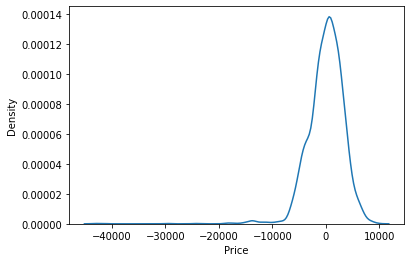

In [185]:
sns.kdeplot(x=predictions-y_test)

In [186]:
r2_score(y_true=y_test,y_pred=predictions)

0.44393013500989686

In [187]:
mean_absolute_error(y_true=y_test,y_pred=predictions)

2445.2201351591057

In [188]:
mean_squared_error(y_true=y_test,y_pred=predictions)

11455278.451351771

In [189]:
lm.coef_

array([-223.98313012,  -98.49583742, 6474.33227294,   96.45466435,
        -37.41287622,  502.70145703, -337.34527856,   96.0680051 ])

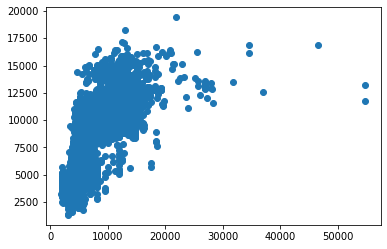

In [190]:
plt.scatter(y_test,predictions)

In [191]:
y_test

5790     4148
4340     3898
3028     3943
3037     3597
8784     2227
        ...  
4320     7888
1977     8479
916     16775
8800    16023
6561    13941
Name: Price, Length: 3180, dtype: int64

In [192]:
predictions

array([ 5248.61899928,  5648.03417328,  4013.47205576, ...,
       13061.01286721, 11986.76257192, 10129.74893605])

In [193]:
lm.score(X_train,y_train)

0.45331422680968925

In [194]:
##---------------------------------------------------------------------------------------##
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(X_train,y_train)
reg.score(X_train,y_train)

0.9211360289608288

In [195]:
y_pred = reg.predict(X_test)

In [196]:
y_test

5790     4148
4340     3898
3028     3943
3037     3597
8784     2227
        ...  
4320     7888
1977     8479
916     16775
8800    16023
6561    13941
Name: Price, Length: 3180, dtype: int64

In [197]:
y_pred

array([ 4690.46      ,  3999.15      ,  3947.1       , ...,
       20390.47583333, 17523.63392857, 12267.94412951])

In [198]:
d='01/12/2020'

In [199]:
d.split('/')[0]

'01'

In [200]:
pd.__version__

'1.3.1'